In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
medicines = pd.read_csv(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\dataset\medicine.csv')

In [3]:
medicines.head()

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [4]:
medicines.shape

(9720, 4)

In [5]:
medicines.isnull().sum()

index          0
Drug_Name      0
Reason         0
Description    0
dtype: int64

In [6]:
medicines.dropna(inplace=True)

In [7]:
medicines.duplicated().sum()

0

In [8]:
medicines['Description']

0                           Mild to moderate acne (spots)
1       A RET 0.025% is a prescription medicine that i...
2       It is used to treat acne vulgaris in people 12...
3       It is used to treat acne vulgaris in people 12...
4       treat the most severe form of acne (nodular ac...
                              ...                        
9715                              used for treating warts
9716                        used to soften the skin cells
9717                                       used for scars
9718                                      used for wounds
9719    used to treat and remove raised warts (usually...
Name: Description, Length: 9720, dtype: object

In [9]:
medicines['Description'].apply(lambda x:x.split())

0                     [Mild, to, moderate, acne, (spots)]
1       [A, RET, 0.025%, is, a, prescription, medicine...
2       [It, is, used, to, treat, acne, vulgaris, in, ...
3       [It, is, used, to, treat, acne, vulgaris, in, ...
4       [treat, the, most, severe, form, of, acne, (no...
                              ...                        
9715                         [used, for, treating, warts]
9716                 [used, to, soften, the, skin, cells]
9717                                   [used, for, scars]
9718                                  [used, for, wounds]
9719    [used, to, treat, and, remove, raised, warts, ...
Name: Description, Length: 9720, dtype: object

In [10]:
medicines['Reason'] = medicines['Reason'].apply(lambda x:x.split())
medicines['Description'] = medicines['Description'].apply(lambda x:x.split())

In [11]:
medicines['Description'] = medicines['Description'].apply(lambda x:[i.replace(" ","") for i in x])

In [12]:
medicines['Description'] = medicines['Description'].apply(lambda x:[i.replace(" ","") for i in x])

In [13]:
medicines['tags'] = medicines['Description'] + medicines['Reason'] 

In [14]:
new_df = medicines[['index','Drug_Name','tags']]

In [15]:
new_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,"[Mild, to, moderate, acne, (spots), Acne]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,"[treat, the, most, severe, form, of, acne, (no..."
...,...,...,...
9715,9716,T Muce Ointment 5gm,"[used, for, treating, warts, Wound]"
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,"[used, to, soften, the, skin, cells, Wound]"
9717,9718,Wokadine M Onit 10gm,"[used, for, scars, Wound]"
9718,9719,Wound Fix Solution 100ml,"[used, for, wounds, Wound]"


In [16]:
new_df['tags'].apply(lambda x:" ".join(x))

0                      Mild to moderate acne (spots) Acne
1       A RET 0.025% is a prescription medicine that i...
2       It is used to treat acne vulgaris in people 12...
3       It is used to treat acne vulgaris in people 12...
4       treat the most severe form of acne (nodular ac...
                              ...                        
9715                        used for treating warts Wound
9716                  used to soften the skin cells Wound
9717                                 used for scars Wound
9718                                used for wounds Wound
9719    used to treat and remove raised warts (usually...
Name: tags, Length: 9720, dtype: object

In [17]:
new_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,"[Mild, to, moderate, acne, (spots), Acne]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,"[treat, the, most, severe, form, of, acne, (no..."
...,...,...,...
9715,9716,T Muce Ointment 5gm,"[used, for, treating, warts, Wound]"
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,"[used, to, soften, the, skin, cells, Wound]"
9717,9718,Wokadine M Onit 10gm,"[used, for, scars, Wound]"
9718,9719,Wound Fix Solution 100ml,"[used, for, wounds, Wound]"


In [18]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\deves\AppData\Local\Temp\ipykernel_160800\3089450492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))


In [19]:
new_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Mild to moderate acne (spots) Acne
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...
...,...,...,...
9715,9716,T Muce Ointment 5gm,used for treating warts Wound
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,used to soften the skin cells Wound
9717,9718,Wokadine M Onit 10gm,used for scars Wound
9718,9719,Wound Fix Solution 100ml,used for wounds Wound


In [20]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

C:\Users\deves\AppData\Local\Temp\ipykernel_160800\3214958533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [21]:
new_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,mild to moderate acne (spots) acne
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,a ret 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...
...,...,...,...
9715,9716,T Muce Ointment 5gm,used for treating warts wound
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,used to soften the skin cells wound
9717,9718,Wokadine M Onit 10gm,used for scars wound
9718,9719,Wound Fix Solution 100ml,used for wounds wound


In [22]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 7.2 MB/s eta 0:00:00


In [23]:
import nltk

In [ ]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [25]:
!pip install -U scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.1 MB 8.4 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.1 MB 8.0 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.1 MB 8.4 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.1 MB 8.9 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 8.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   -- ------------------------------------- 2.1/40.9 MB 10.7 MB/s eta 0:00:04
   --- ------------------------------------ 3.1/40.9 MB 9.7 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/40.9 MB 6.6 MB/s eta 0:00:06
   ------

In [ ]:
# Bag-of-Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',max_features=5000)

In [27]:
def stem(text):
  y = []

  for i in text.split():
    y.append(ps.stem(i))

  return " ".join(y)  

In [28]:
new_df['tags'] = new_df['tags'].apply(stem)

C:\Users\deves\AppData\Local\Temp\ipykernel_160800\3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [29]:
cv.fit_transform(new_df['tags']).toarray().shape

(9720, 806)

In [30]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [32]:
cv.get_feature_names_out()

array(['025', '12', '16', '18', 'abdomin', 'abl', 'ach', 'acid', 'acn',
       'acne', 'acquir', 'action', 'activ', 'acut', 'acute', 'adequ',
       'adhd', 'adjunct', 'adolesc', 'adult', 'adults', 'affect', 'ag',
       'age', 'aids', 'allerg', 'allergen', 'allergi', 'allow', 'alon',
       'alzheim', 'alzheimer', 'alzheimerâ', 'amoebiasi', 'anaemia',
       'anal', 'angina', 'angl', 'ani', 'ankylos', 'anorexia', 'anoth',
       'anti', 'antioxid', 'antipsychot', 'antiretrovir', 'anxieti',
       'anxiou', 'anxious', 'apnoea', 'appear', 'appetit', 'appetite',
       'appli', 'appropri', 'area', 'arrhythmia', 'arrhythmiasi',
       'arteri', 'arthralgia', 'arthriti', 'associ', 'atherothrombot',
       'athleteâ', 'atop', 'atrial', 'attack', 'awak', 'b1', 'b2', 'b3',
       'b5', 'b6', 'babi', 'backache', 'bacteri', 'bacteria', 'balanc',
       'balanitis', 'bandag', 'becom', 'behaviour', 'beliefs', 'benefit',
       'beta', 'biliari', 'biotin', 'bite', 'blackhead', 'blackheads',
      

In [ ]:
# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
cosine_similarity(vectors)

array([[1.        , 0.25197632, 0.43643578, ..., 0.        , 0.        ,
        0.        ],
       [0.25197632, 1.        , 0.25660012, ..., 0.19245009, 0.1490712 ,
        0.0860663 ],
       [0.43643578, 0.25660012, 1.        , ..., 0.11111111, 0.0860663 ,
        0.0993808 ],
       ...,
       [0.        , 0.19245009, 0.11111111, ..., 1.        , 0.77459667,
        0.2981424 ],
       [0.        , 0.1490712 , 0.0860663 , ..., 0.77459667, 1.        ,
        0.34641016],
       [0.        , 0.0860663 , 0.0993808 , ..., 0.2981424 , 0.34641016,
        1.        ]])

In [35]:
similarity = cosine_similarity(vectors)

In [36]:
similarity[1]

array([0.25197632, 1.        , 0.25660012, ..., 0.19245009, 0.1490712 ,
       0.0860663 ])

In [37]:
def recommend(medicine):
    medicine_index = new_df[new_df['Drug_Name'] == medicine].index[0]
    distances = similarity[medicine_index]
    medicines_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in medicines_list:
        print(new_df.iloc[i[0]].Drug_Name)
    

In [38]:
recommend("Paracetamol 125mg Syrup 60mlParacetamol 500mg Tablet 10'S")

Oxypamol D Tablet 10'S
Pacimol MF Tablet 10'S
Painil Plus 100/500mg Tablet 10'S
Pamagin Plus Gel 30gm
Paracetamol 125mg Syrup 60mlParacetamol 500mg Tablet 10'S


In [39]:
import pickle

In [40]:
pickle.dump(new_df.to_dict(),open('medicine_dict.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

# Load existing medicine data and feedback data
medicines = pd.read_csv(r"C:\Users\deves\Downloads\Medicine-Recommendation-System-main\dataset\medicine.csv")
feedback_df = pd.read_csv(r"C:\Users\deves\Downloads\Medicine-Recommendation-System-main\feedback_data.csv")  # Ensure this file exists after collecting feedback

# (Optional) Pre-process feedback: you could use feedback to filter out or reweight recommendations.
# For instance, create a "helpfulness score" for each medicine:
feedback_summary = feedback_df.groupby('medicine')['feedback'].apply(
    lambda x: (x == 'helpful').sum() - (x == 'not_helpful').sum()).reset_index()
feedback_summary.columns = ['medicine', 'helpfulness_score']

# Merge the feedback summary with your medicines DataFrame (if your medicines DataFrame contains a 'Drug_Name' column)
medicines = medicines.merge(feedback_summary, left_on='Drug_Name', right_on='medicine', how='left')
medicines['helpfulness_score'] = medicines['helpfulness_score'].fillna(0)

# Now update your NLP pipeline accordingly.
# Example: adjust tags or re-run the vectorizer using the updated data.
medicines['tags'] = medicines['Description'] + " " + medicines['Reason']  # adjust as needed
medicines['tags'] = medicines['tags'].str.lower()

# You may wish to incorporate the helpfulness score by weighting the text (this is an advanced step):
# For now, we will simply re-fit the vectorizer.
cv = CountVectorizer(stop_words='english', max_features=5000)
vectors = cv.fit_transform(medicines['tags']).toarray()

# Compute the cosine similarity matrix
similarity = cosine_similarity(vectors)

# Save the updated models (dictionary and similarity matrix)
medicine_dict = medicines.to_dict()
pickle.dump(medicine_dict, open(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\models\medicine_dict.pkl', 'wb'))
pickle.dump(similarity, open(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\models\similarity.pkl', 'wb'))

print("Updated model saved with new feedback.")


C:\Users\deves\AppData\Local\Temp\ipykernel_160800\736251638.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medicines['helpfulness_score'] = medicines['helpfulness_score'].fillna(0)


Updated model saved with new feedback.


In [44]:
!pip install transformers


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/10.2 MB 6.1 MB/s eta 0:00:02
   ------------ --------------------------- 3.1/10.2 MB 7.4 MB/s eta 0:00:01
   -------------------- ------------------- 5.2/10.2 MB 8.6 MB/s eta 0:00:01
   ---------------------------- ----------- 7.3/10.2 MB 9.1 MB/s eta 0:00:01
   -------------------------------------- - 9.7/10.2 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 10.2/10.2 MB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------- ----- 2.1/2.4 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 9.2 MB/s eta 0:00:00


In [49]:
pip install --upgrade transformers torch


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/204.1 MB 10.7 MB/s eta 0:00:19
    --------------------------------------- 4.2/204.1 MB 10.5 MB/s eta 0:00:20
   - -------------------------------------- 6.8/204.1 MB 10.7 MB/s eta 0:00:19
   - -------------------------------------- 8.9/204.1 MB 10.6 MB/s eta 0:00:19
   -- ------------------------------------- 11.0/204.1 MB 10.4 MB/s eta 0:00:19
   -- ------------------------------------- 12.3/204.1 MB 10.0 MB/s eta 0:00:20
   -- ------------------------------------- 13.9/204.1 MB 9.5 MB/s eta 0:00:21
   -- ------------------------------------- 15.2/204.1 MB 9.2 MB/s eta 0:00:21
   --- ------------------------------------ 16.5/204.1 MB 8.9 MB/s eta 0:00:22
   --- ------------------------------------ 18.1/204.1 MB 8.6 MB/s eta 0:00:22
   --- ------------------------------------ 19.7/204.1 MB 8

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.4.0+cpu requires torch==2.4.0, but you have torch 2.6.0 which is incompatible.
torchvision 0.19.0 requires torch==2.4.0, but you have torch 2.6.0 which is incompatible.


In [9]:
import pandas as pd
from transformers import pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import numpy as np

# Load medicine data (adjust the path as needed)
medicines = pd.read_csv(r"C:\Users\deves\Downloads\Medicine-Recommendation-System-main\dataset\medicine.csv")

# Load feedback data (if exists)
feedback_file = r"C:\Users\deves\Downloads\Medicine-Recommendation-System-main\feedback_data.csv"
try:
    feedback_df = pd.read_csv(feedback_file)
except Exception as e:
    print("No feedback data found. Skipping feedback processing.")
    feedback_df = pd.DataFrame(columns=['medicine', 'recommendations', 'feedback', 'comments'])

# Initialize a sentiment analysis pipeline (using Hugging Face Transformers)
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

def get_sentiment_score(comment):
    """Return a sentiment score based on the comment.
       Positive sentiment adds weight and negative subtracts.
    """
    if comment.strip() == "":
        return 0
    result = sentiment_analyzer(comment)[0]
    # For instance, if the sentiment is positive, use the score as is; if negative, negate it.
    score = result['score']
    return score if result['label'] == "POSITIVE" else -score

# Create a helpfulness score for each medicine based on binary feedback and comment sentiment
if not feedback_df.empty:
    # Compute a base score from binary feedback:
    feedback_df['base_score'] = feedback_df['feedback'].apply(lambda x: 1 if x == 'helpful' else -1)
    # Compute sentiment scores:
    feedback_df['sentiment_score'] = feedback_df['comments'].apply(get_sentiment_score)
    # Combine the two scores (you can weight these differently if desired)
    feedback_df['total_score'] = feedback_df['base_score'] + feedback_df['sentiment_score']
    
    # Aggregate feedback per medicine (here using the medicine name provided in feedback)
    feedback_summary = feedback_df.groupby('medicine')['total_score'].mean().reset_index()
    feedback_summary.columns = ['medicine', 'helpfulness_score']
else:
    # If no feedback exists, set a default score of 0.
    feedback_summary = pd.DataFrame(columns=['medicine', 'helpfulness_score'])

# Merge the aggregated feedback with the medicines dataframe.
# Assume your medicines DataFrame has a column 'Drug_Name' that corresponds to the feedback medicine name.
medicines = medicines.merge(feedback_summary, left_on='Drug_Name', right_on='medicine', how='left')
medicines['helpfulness_score'] = medicines['helpfulness_score'].fillna(0)

# Now, update your medicine tags.
# For a fully NLP-based approach, you might consider that more "helpful" medicines get a slight boost.
# For example, append the helpfulness score as text to the medicine tags.
medicines['tags'] = (medicines['Description'] + " " + medicines['Reason']).str.lower() + " " + \
                    medicines['helpfulness_score'].astype(str)

# Initialize and fit the vectorizer
cv = CountVectorizer(stop_words='english', max_features=5000)
vectors = cv.fit_transform(medicines['tags']).toarray()

# Compute the cosine similarity matrix
similarity = cosine_similarity(vectors)

# Save the updated model data
medicine_dict = medicines.to_dict()
pickle.dump(medicine_dict, open(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\models\medicine_dict.pkl', 'wb'))
pickle.dump(similarity, open(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\models\similarity.pkl', 'wb'))

print("Model updated")


Device set to use cpu


Model updated


In [7]:
import pickle

# Load the updated files
medicine_dict = pickle.load(open(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\models\medicine_dict.pkl', 'rb'))
similarity = pickle.load(open(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\models\similarity.pkl', 'rb'))

print(medicine_dict.keys())  # Check the keys in the medicine dictionary
print(similarity.shape)      # Check the shape of the similarity matrix

dict_keys(['index', 'Drug_Name', 'Reason', 'Description', 'medicine', 'helpfulness_score', 'tags'])
(9720, 9720)


In [5]:
pip show optree

Name: optree
Version: 0.13.0
Summary: Optimized PyTree Utilities.
Home-page: https://github.com/metaopt/optree
Author: OpTree Contributors
Author-email: Xuehai Pan <XuehaiPan@pku.edu.cn>, Jie Ren <jieren9806@gmail.com>
License: Apache License, Version 2.0
Location: C:\Users\deves\AppData\Roaming\Python\Python312\site-packages
Requires: typing-extensions
Required-by: keras
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Sentiment Analysis (Hugging Face Transformers)
from transformers import pipeline

# Force transformers to use PyTorch instead of TensorFlow
import os
os.environ["TRANSFORMERS_NO_TF"] = "1"

# Initialize a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

# Test the pipeline
result = sentiment_analyzer("I love using Hugging Face Transformers!")
print(result)

c:\Program Files\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
C:\Users\deves\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machi

[{'label': 'POSITIVE', 'score': 0.9971315860748291}]


In [10]:
# Perform sentiment analysis on the comments in the feedback data
feedback_df['sentiment_analysis'] = feedback_df['comments'].apply(lambda x: sentiment_analyzer(x)[0])

# Extract sentiment labels and scores
feedback_df['sentiment_label'] = feedback_df['sentiment_analysis'].apply(lambda x: x['label'])
feedback_df['sentiment_score'] = feedback_df['sentiment_analysis'].apply(lambda x: x['score'])

# Display the updated feedback DataFrame with sentiment analysis results
print(feedback_df[['comments', 'sentiment_label', 'sentiment_score']])

          comments sentiment_label  sentiment_score
0  all are correct        POSITIVE         0.999790
1          correct        POSITIVE         0.999757
2          correct        POSITIVE         0.999757


In [ ]:
# TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=50)  # Extract top 50 keywords
tfidf_matrix = tfidf.fit_transform(medicines['tags'])

# Get feature names (keywords)
keywords = tfidf.get_feature_names_out()

# Sum up the TF-IDF scores for each keyword across all documents
tfidf_scores = tfidf_matrix.sum(axis=0).A1
keyword_scores = dict(zip(keywords, tfidf_scores))

# Sort keywords by their importance
sorted_keywords = sorted(keyword_scores.items(), key=lambda x: x[1], reverse=True)

# Display the top keywords
print("Top Keywords:")
for keyword, score in sorted_keywords[:10]:  # Display top 10 keywords
    print(f"{keyword}: {score}")

Top Keywords:
hypertension: 1072.3237764926482
pain: 1069.0062119231711
used: 1061.1358066855132
infection: 857.1334384609157
treat: 800.6476216326606
blood: 696.7019120001904
pressure: 648.5118890379836
high: 615.4972679893041
fungal: 407.73598343067005
patients: 396.42518360354956


This will show which conditions (e.g., "Acne", "Hypertension") dominate the dataset, helping you focus on prevalent medical needs.


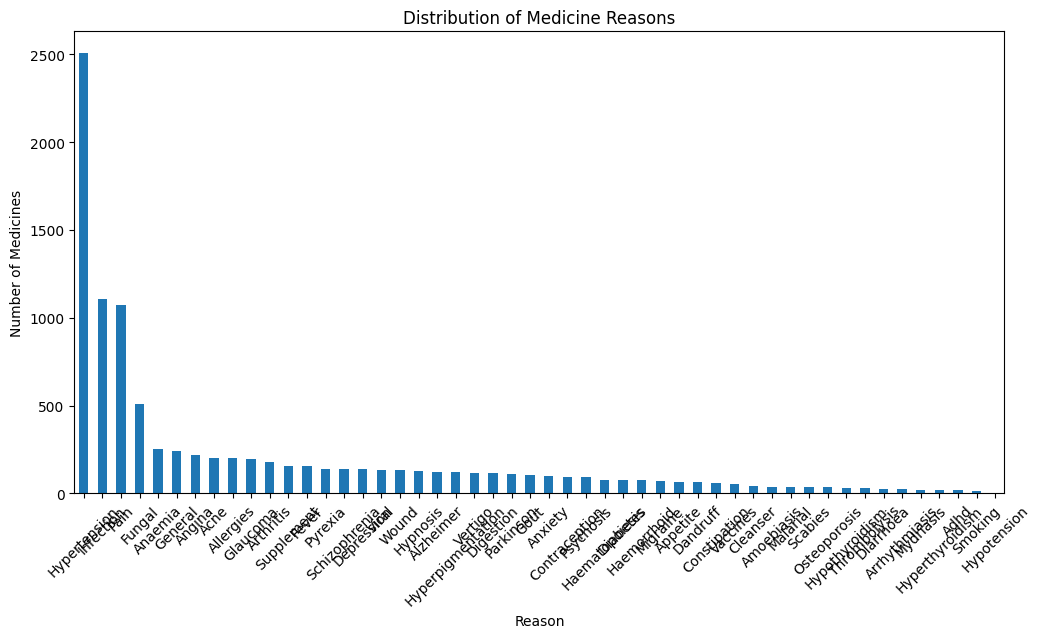

Top 5 Reasons:
 Reason
Hypertension    2505
Infection       1109
Pain            1072
Fungal           509
Anaemia          252
Name: count, dtype: int64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
medicines = pd.read_csv(r'C:\\Users\\deves\\Downloads\\Medicine-Recommendation-System-main\\dataset\\medicine.csv')

# Plot the distribution of Reasons
reason_counts = medicines['Reason'].value_counts()
plt.figure(figsize=(12, 6))
reason_counts.plot(kind='bar')
plt.title('Distribution of Medicine Reasons')
plt.xlabel('Reason')
plt.ylabel('Number of Medicines')
plt.xticks(rotation=45)
plt.show()

# Display top 5 reasons
print("Top 5 Reasons:\n", reason_counts.head())

If descriptions vary widely in length, shorter ones might lack detail, potentially affecting recommendation quality. You could correlate this with helpfulness_score (if available) to see if longer descriptions are perceived as more helpful.

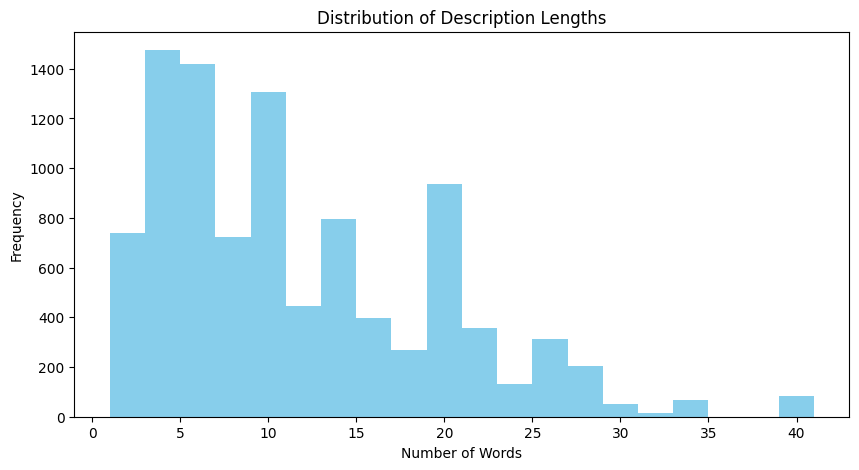

Description Length Stats:
 count    9720.000000
mean       11.209156
std         7.841625
min         1.000000
25%         5.000000
50%        10.000000
75%        16.000000
max        41.000000
Name: desc_length, dtype: float64


In [9]:
# Calculate description lengths (number of words)
medicines['desc_length'] = medicines['Description'].apply(lambda x: len(x.split()))

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(medicines['desc_length'], bins=20, color='skyblue')
plt.title('Distribution of Description Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Basic statistics
print("Description Length Stats:\n", medicines['desc_length'].describe())

This shows whether feedback is predominantly positive or negative, which could inform how much trust to place in the helpfulness_score.

Device set to use cpu


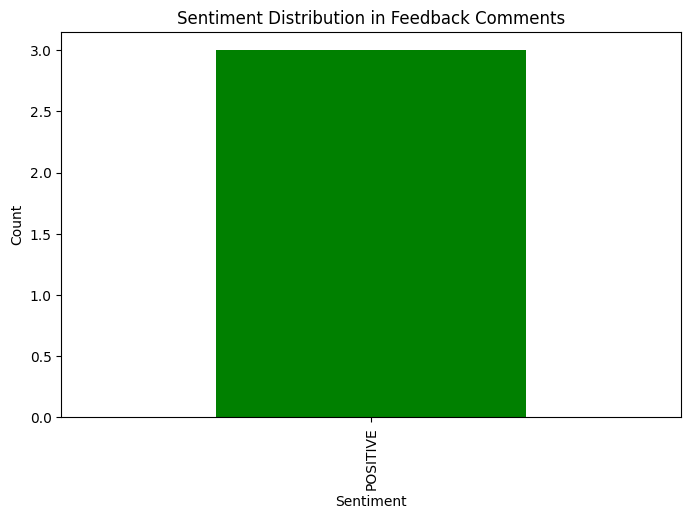

In [10]:
# Assuming feedback_df is loaded with sentiment analysis
feedback_df = pd.read_csv(r'C:\\Users\\deves\\Downloads\\Medicine-Recommendation-System-main\\feedback_data.csv')
from transformers import pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
feedback_df['sentiment'] = feedback_df['comments'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
feedback_df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution in Feedback Comments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

This might reveal clusters like "pain relief," "skin conditions," or "chronic diseases," providing a deeper categorization of medicines.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the tags
cv = CountVectorizer(stop_words='english', max_features=5000)
tag_vectors = cv.fit_transform(medicines['Description'])

# Topic Modeling (LDA)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(tag_vectors)

# Display top words per topic
feature_names = cv.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

Topic 1: infection, pain, used, infections, blood, treatment, skin, chest, respiratory, angina
Topic 2: pressure, blood, high, hypertension, called, patients, used, pain, treat, stroke
Topic 3: treat, used, acne, conditions, disease, treatment, moderate, people, pain, skin
Topic 4: reduces, diabetes, pressure, disease, type, patients, blood, kidney, high, slow
Topic 5: treat, tinea, symptomatic, reduce, used, failure, adults, skin, eye, anaemia


This highlights condition-specific terms (e.g., "acne" might yield "spots, vulgaris"), enhancing the recommendation system’s specificity.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Group by Reason and extract keywords
for reason in medicines['Reason'].unique()[:5]:  # Limit to top 5 for brevity
    subset = medicines[medicines['Reason'] == reason]['Description']
    tfidf = TfidfVectorizer(stop_words='english', max_features=10)
    tfidf_matrix = tfidf.fit_transform(subset)
    keywords = tfidf.get_feature_names_out()
    print(f"\nTop keywords for {reason}: {', '.join(keywords)}")


Top keywords for Acne: acne, form, nodular, pimple, severe, skin, treat, used, vulgaris, vulgarisâ

Top keywords for Adhd: acne, dry, form, scaly, severe, skin, spots, treat, used, vulgaris

Top keywords for Allergies: acne, allergies, allergy, care, good, itching, relief, skin, soothens, types

Top keywords for Alzheimer: adults, alzheimer, alzheimerâ, dementia, disease, moderate, severe, trauma, treat, used

Top keywords for Amoebiasis: brain, constipation, diarrhea, having, indicated, infections, lung, surgery, treat, treatment


Using word embeddings (e.g., Word2Vec) and clustering can group medicines by semantic similarity.

In [ ]:
# Word Embeddings (Word2Vec)
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np

# Tokenize tags
tokenized_tags = medicines['tags'].apply(lambda x: x.split())

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_tags, vector_size=100, window=5, min_count=1, workers=4)

# Get average embedding for each medicine
def get_embedding(text, model):
    words = text.split()
    embeddings = [model.wv[word] for word in words if word in model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(100)

embeddings = np.array([get_embedding(tag, w2v_model) for tag in medicines['tags']])

# Cluster medicines
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(embeddings)
medicines['cluster'] = clusters

# Display cluster sizes
print(medicines['cluster'].value_counts())

cluster
1    3611
0    2707
2    1667
3    1262
4     473
Name: count, dtype: int64


In [15]:
import pickle
import numpy as np

# Load similarity matrix and medicine data
similarity = pickle.load(open('similarity.pkl', 'rb'))
medicine_dict = pickle.load(open('medicine_dict.pkl', 'rb'))
medicines = pd.DataFrame(medicine_dict)

# Recommendation function with helpfulness weighting
def recommend(medicine_name, top_n=5):
    idx = medicines[medicines['Drug_Name'] == medicine_name].index[0]
    sim_scores = similarity[idx]
    # Adjust similarity by helpfulness (e.g., boost by 1 + score)
    weighted_scores = sim_scores * (1 + medicines['helpfulness_score'].fillna(0))
    # Get top N similar medicines
    similar_indices = weighted_scores.argsort()[::-1][1:top_n+1]
    return medicines['Drug_Name'].iloc[similar_indices].tolist()

# Test the function
print(recommend("A CN Gel(Topical) 20gmA CN Soap 75gm"))

['Clindapene Gel 15gm', 'Enshine Ointment 15gm', "Acnetoin 20mg Capsule 10'SAcnetoin Gel 15gm", 'Acnin Pimple Care Face Pack 50gm', 'Depiglare Cream 15gm']


In [43]:
import pandas as pd

# Load your data (adjust paths as needed)
medicines = pd.read_csv(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\dataset\medicine.csv')  # Contains 'Drug_Name', 'Description', 'Reason'

# Example: Merge with feedback data
feedback_summary = pd.DataFrame({'medicine': ['DrugA'], 'helpfulness_score': [0.5]})
medicines = medicines.merge(feedback_summary, left_on='Drug_Name', right_on='medicine', how='left')
medicines['helpfulness_score'] = medicines['helpfulness_score'].fillna(0)

# Verify the column exists
print('Columns:', medicines.columns.tolist())
print('helpfulness_score present:', 'helpfulness_score' in medicines.columns)

# Create the 'tags' column
medicines['tags'] = (medicines['Description'] + " " + medicines['Reason']).str.lower() + " " + medicines['helpfulness_score'].astype(str)

# Check the result
print(medicines.head())

Columns: ['index', 'Drug_Name', 'Reason', 'Description', 'medicine', 'helpfulness_score']
helpfulness_score present: True
   index                                          Drug_Name Reason  \
0      1               A CN Gel(Topical) 20gmA CN Soap 75gm   Acne   
1      2  A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...   Acne   
2      3                             ACGEL CL NANO Gel 15gm   Acne   
3      4                                ACGEL NANO Gel 15gm   Acne   
4      5                              Acleen 1% Lotion 25ml   Acne   

                                         Description medicine  \
0                      Mild to moderate acne (spots)      NaN   
1  A RET 0.025% is a prescription medicine that i...      NaN   
2  It is used to treat acne vulgaris in people 12...      NaN   
3  It is used to treat acne vulgaris in people 12...      NaN   
4  treat the most severe form of acne (nodular ac...      NaN   

   helpfulness_score                                              

 Longer descriptions might indicate complex conditions or detailed usage instructions, while shorter ones could suggest simpler treatments.

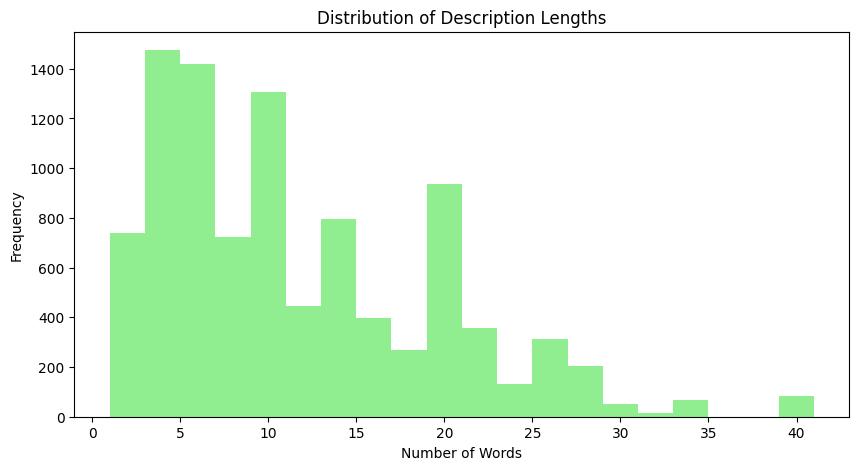

Average Description Length per Reason:
 Reason
Haemorrhoid          27.933333
Hypnosis             27.000000
Hypothyroidism       24.818182
Contraception        24.114583
Schizophrenia        23.251799
Thrombolysis         22.000000
Angina               20.931507
Haematopoiesis       18.987342
Digestion            16.333333
Psychosis            14.890110
Glaucoma             14.878173
Gout                 14.616822
Arthritis            13.983146
Hypertension         13.477046
Fever                13.152866
Osteoporosis         12.742857
Acne                 11.632353
Arrhythmiasis        11.000000
Adhd                 10.941176
Anaemia              10.765873
Supplement           10.566038
Mydriasis            10.315789
Appetite             10.014925
Parkinson            10.000000
Diabetes              9.831169
Diarrhoea             9.714286
Hyperthyroidism       9.529412
Migraine              9.242857
Anxiety               8.752577
Pain                  8.642724
Fungal                8

In [48]:
medicines['desc_length'] = medicines['Description'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
plt.hist(medicines['desc_length'], bins=20, color='lightgreen')
plt.title('Distribution of Description Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Average length per Reason
avg_length = medicines.groupby('Reason')['desc_length'].mean().sort_values(ascending=False)
print("Average Description Length per Reason:\n", avg_length)

In [49]:
unique_descriptions = medicines['Description'].nunique()
total_medicines = len(medicines)
print(f"Unique Descriptions: {unique_descriptions} out of {total_medicines} medicines")

Unique Descriptions: 290 out of 9720 medicines


In [50]:
diversity = medicines.groupby('Reason')['Drug_Name'].nunique().sort_values(ascending=False)
print("Number of Unique Medicines per Reason:\n", diversity)

Number of Unique Medicines per Reason:
 Reason
Hypertension         2505
Infection            1109
Pain                 1072
Fungal                509
Anaemia               252
General               243
Angina                219
Acne                  204
Allergies             203
Glaucoma              197
Arthritis             178
Supplement            159
Fever                 157
Pyrexia               141
Schizophrenia         139
Depression            139
Hypnosis              129
Alzheimer             123
Hyperpigmentation     122
Vertigo               119
Digestion             117
Parkinson             108
Gout                  107
Viral                 103
Anxiety                97
Contraception          96
Psychosis              91
Haematopoiesis         79
Diabetes               77
Haemorrhoid            75
Wound                  72
Migraine               70
Appetite               67
Dandruff               63
Constipation           61
Vaccines               51
Cleanser         

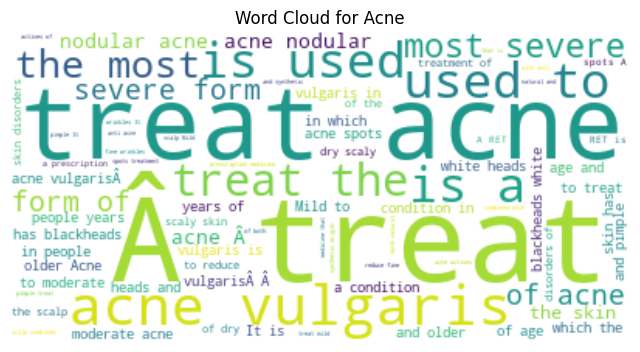

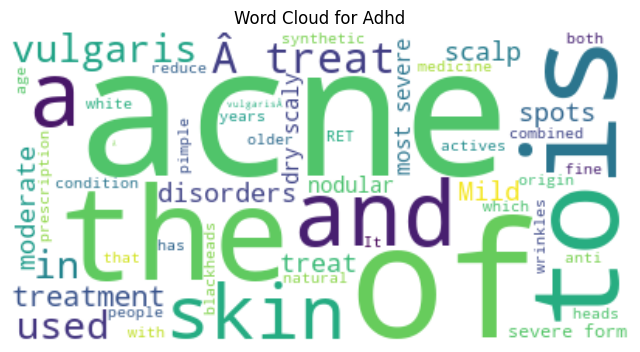

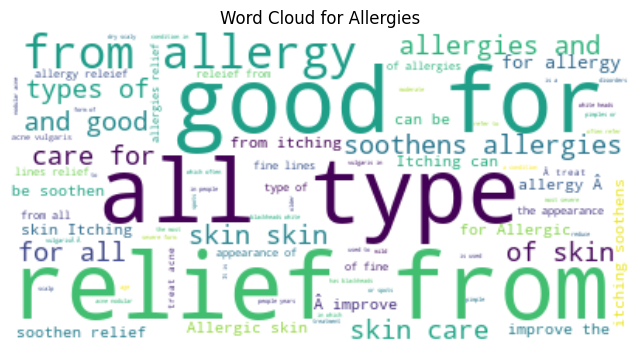

In [53]:
from wordcloud import WordCloud

for reason in medicines['Reason'].unique()[:3]:  # Limit to top 3 for brevity
    text = ' '.join(medicines[medicines['Reason'] == reason]['Description'])
    wordcloud = WordCloud(stopwords='english', background_color='white').generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {reason}')
    plt.axis('off')
    plt.show()

In [54]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

vectors = CountVectorizer(stop_words='english').fit_transform(medicines['Description']).toarray()
for reason in medicines['Reason'].unique()[:3]:  # Limit to top 3
    indices = medicines[medicines['Reason'] == reason].index
    if len(indices) > 1:
        sim_matrix = cosine_similarity(vectors[indices])
        avg_sim = np.mean(sim_matrix[np.triu_indices(len(sim_matrix), k=1)])
        print(f"Average similarity within {reason}: {avg_sim:.2f}")

Average similarity within Acne: 0.31
Average similarity within Adhd: 0.24
Average similarity within Allergies: 0.18


Purpose: Assess the complexity of descriptions to ensure they’re suitable for your audience.

Method: Use the Flesch-Kincaid grade level metric.

In [ ]:
# Readability Assessment (Flesch-Kincaid)

from textstat import flesch_kincaid_grade

medicines['readability'] = medicines['Description'].apply(flesch_kincaid_grade)
avg_readability = medicines.groupby('Reason')['readability'].mean().sort_values(ascending=False)
print("Average Readability (Grade Level) per Reason:\n", avg_readability)

Average Readability (Grade Level) per Reason:
 Reason
Hypotension          26.500000
Haemorrhoid          18.924000
Anxiety              18.422680
Hypnosis             17.400000
Pain                 17.026493
Diarrhoea            16.985714
Diabetes             16.641558
Schizophrenia        16.523022
Constipation         14.731148
Hyperthyroidism      14.323529
Haematopoiesis       14.230380
Supplement           13.133333
Fever                12.199363
Anaemia              12.196825
Depression           12.030935
Malarial             11.900000
Viral                11.694853
Amoebiasis           11.221622
Hyperpigmentation    11.188525
Arrhythmiasis        11.100000
Digestion            11.012821
Angina               10.892237
Fungal               10.259136
Vaccines             10.221569
Contraception        10.117708
Migraine             10.072857
Infection             9.749865
Arthritis             9.721910
Appetite              9.713433
Hypothyroidism        9.487879
Hypertension    

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

for reason in medicines['Reason'].unique()[:3]:  # Limit to top 3
    subset = medicines[medicines['Reason'] == reason]['Description']
    tfidf = TfidfVectorizer(stop_words='english', max_features=5)
    tfidf_matrix = tfidf.fit_transform(subset)
    keywords = tfidf.get_feature_names_out()
    print(f"\nTop TF-IDF keywords for {reason}: {', '.join(keywords)}")


Top TF-IDF keywords for Acne: acne, form, skin, treat, vulgaris

Top TF-IDF keywords for Adhd: acne, skin, treat, used, vulgaris

Top TF-IDF keywords for Allergies: allergies, allergy, good, relief, skin


In [7]:
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
import numpy as np
import pandas as pd

# Recalculate embeddings if not already defined
if 'embeddings' not in locals():
	# Ensure medicines is defined
	if 'medicines' not in locals():
		medicines = pd.read_csv(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\dataset\medicine.csv')
		medicines['tags'] = medicines['Description'] + " " + medicines['Reason']
		medicines['tags'] = medicines['tags'].str.lower()

	# Tokenize tags
	tokenized_tags = medicines['tags'].apply(lambda x: x.split())

	# Train Word2Vec model
	w2v_model = Word2Vec(sentences=tokenized_tags, vector_size=100, window=5, min_count=1, workers=4)

	# Get average embedding for each medicine
	def get_embedding(text, model):
		words = text.split()
		embeddings = [model.wv[word] for word in words if word in model.wv]
		return np.mean(embeddings, axis=0) if embeddings else np.zeros(100)

	embeddings = np.array([get_embedding(tag, w2v_model) for tag in medicines['tags']])

from sklearn.cluster import KMeans

# Perform clustering to generate cluster labels
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(embeddings)

# Calculate silhouette score
sil_score = silhouette_score(embeddings, clusters)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.2283754199743271


In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Example ratings
predicted_ratings = [4.5, 3.0, 5.0]
actual_ratings = [5.0, 3.0, 4.0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
print(f"RMSE: {rmse}")

RMSE: 0.6454972243679028


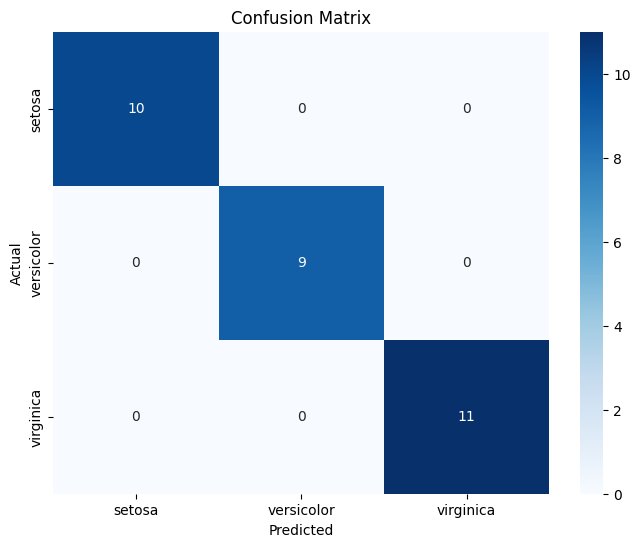

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels (0, 1, 2 for three classes)

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Logistic Regression model
model = LogisticRegression(max_iter=200)  # Increase max_iter if convergence is an issue
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 6: Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 7: Calculate and display performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display detailed metrics: precision, recall, and F1-score for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))